In [1]:
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt

### Problem 1

In [2]:
class KDTree:
    def __init__(self, matrix):
        self.root = self.build_tree(matrix, 0)

    def build_tree(self, matrix, depth):
        if len(matrix) == 0:
            return None
        axis = depth % 2
        matrix = matrix[matrix[:, axis].argsort()]
        median = len(matrix) // 2
        node = Node(matrix[median])
        node.left = self.build_tree(matrix[:median], depth + 1)
        node.right = self.build_tree(matrix[median + 1:], depth + 1)
        return node

    def find_nearest(self, vector):
        return self.find_nearest_helper(self.root, vector, 0)

    def find_nearest_helper(self, node, vector, depth):
        if node is None:
            return float('inf'), None
        axis = depth % 2
        next_branch = None
        opposite_branch = None
        if vector[axis] < node.value[axis]:
            next_branch = node.left
            opposite_branch = node.right
        else:
            next_branch = node.right
            opposite_branch = node.left
        best_dist, best_node = self.find_nearest_helper(next_branch, vector, depth + 1)
        if best_dist > abs(vector[axis] - node.value[axis]):
            temp_dist, temp_node = self.find_nearest_helper(opposite_branch, vector, depth + 1)
            if temp_dist < best_dist:
                best_dist = temp_dist
                best_node = temp_node
        dist_to_current_node = np.linalg.norm(vector - node.value)
        if dist_to_current_node < best_dist:
            best_dist = dist_to_current_node
            best_node = node.value
        return best_dist, best_node

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

### Problem 2

(10000, 2)
(10000,)


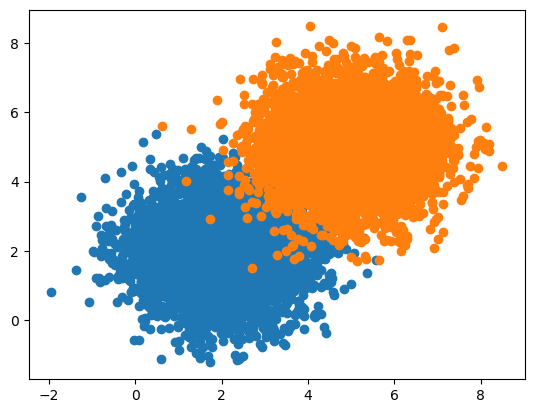

In [3]:
##
# Construct matrix X:
#
mean_X1 = (2,2)
cov_X1 = np.array([[1, 0], [0, 1]])
X1 = np.random.multivariate_normal(mean_X1, cov_X1, size = 5000)

mean_X2 = (5,5)
cov_X2 = np.array([[1, 0], [0, 1]])
X2 = np.random.multivariate_normal(mean_X2, cov_X2, size = 5000)

X = np.concatenate((X1,X2), axis = 0)

##
# Construct matrix Y:
#
Y1 = np.zeros(X1.shape[0])
Y2 = np.ones(X2.shape[0])

Y = np.concatenate((Y1, Y2), axis = 0)

##
# Sanity check:
#
print(X.shape)
print(Y.shape)
plt.scatter(x = X1[ : , 0], y = X1[ : , 1])
plt.scatter(x = X2[ : , 0], y = X2[ : , 1])
plt.show()


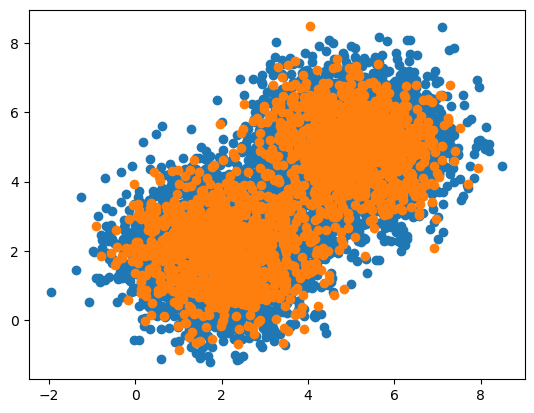

In [4]:
##
# Partition X and Y into training and test sets:
#
cutoff = 0.8
mask = np.random.rand(X.shape[0]) < cutoff
X_train = X[mask]
X_test = X[np.logical_not(mask)]

Y_train = Y[mask]
Y_test = Y[np.logical_not(mask)]

##
# Sanity check
#
plt.scatter(x = X_train[ : , 0], y = X_train[ : , 1])
plt.scatter(x = X_test[ : , 0], y = X_test[ : , 1])

### Problem 3:

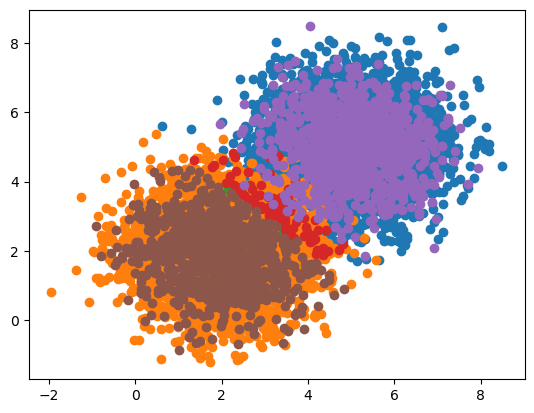

In [5]:
##
# Construct the maximum-likelihood linear least squares function (Y = beta * X):
#
X_train_T = np.transpose(X_train)
beta = np.dot(np.dot(np.linalg.inv(np.dot(X_train_T, X_train)), X_train_T), Y_train)

##
# Classify the elements of test set by including the threshold to the regression function:
#
Yhat_test = np.dot(X_test, beta)
Yhat_test = np.where(Yhat_test > 0.5, 0, 1)

##
# Plot:
#
X_train_class_1 = X_train[Y_train == 1, :]
X_train_class_0 = X_train[Y_train == 0, :]

class_1_corrected = []
for i in range(0, Y_test.shape[0]):
    if Y_test[i] == 1:
        if Y_test[i] == Yhat_test[i]:
            class_1_corrected.append(i)
X_test_class_1_corrected = X_test[(class_1_corrected), :]

class_0_corrected = []
for i in range(0, Y_test.shape[0]):
    if Y_test[i] == 0:
        if Y_test[i] == Yhat_test[i]:
            class_0_corrected.append(i)
X_test_class_0_corrected = X_test[(class_0_corrected), :]

class_1_incorrected = []
for i in range(0, Y_test.shape[0]):
    if Y_test[i] == 1:
        if Y_test[i] != Yhat_test[i]:
            class_1_incorrected.append(i)
X_test_class_1_incorrected = X_test[(class_1_incorrected), :]

class_0_incorrected = []
for i in range(0, Y_test.shape[0]):
    if Y_test[i] == 0:
        if Y_test[i] != Yhat_test[i]:
            class_0_incorrected.append(i)
X_test_class_0_incorrected = X_test[(class_0_incorrected), :]

plt.scatter(x = X_train_class_1[ : , 0], y = X_train_class_1[ : , 1])
plt.scatter(x = X_train_class_0[ : , 0], y = X_train_class_0[ : , 1])
plt.scatter(x = X_test_class_1_corrected[ : , 0], y = X_test_class_1_corrected[ : , 1])
plt.scatter(x = X_test_class_0_corrected[ : , 0], y = X_test_class_0_corrected[ : , 1])
plt.scatter(x = X_test_class_1_incorrected[ : , 0], y = X_test_class_1_incorrected[ : , 1])
plt.scatter(x = X_test_class_0_incorrected[ : , 0], y = X_test_class_0_incorrected[ : , 1])

accuracy = (X_test_class_1_corrected.shape[0] + X_test_class_0_corrected.shape[0]) / X_test.shape[0]

##
# Sanity check:
#


### Problem 4

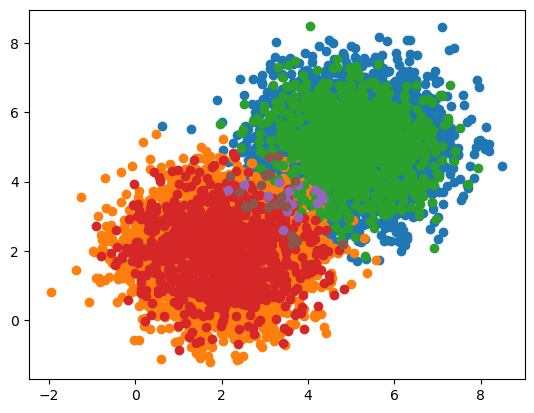

In [7]:
tree = cKDTree(X_train)
_ , indices = tree.query(X_test)

Yhat_test = Y_train[indices]

class_1_corrected = []
for i in range(0, Y_test.shape[0]):
    if Y_test[i] == 1:
        if Y_test[i] == Yhat_test[i]:
            class_1_corrected.append(i)
X_test_class_1_corrected = X_test[(class_1_corrected), :]

class_0_corrected = []
for i in range(0, Y_test.shape[0]):
    if Y_test[i] == 0:
        if Y_test[i] == Yhat_test[i]:
            class_0_corrected.append(i)
X_test_class_0_corrected = X_test[(class_0_corrected), :]

class_1_incorrected = []
for i in range(0, Y_test.shape[0]):
    if Y_test[i] == 1:
        if Y_test[i] != Yhat_test[i]:
            class_1_incorrected.append(i)
X_test_class_1_incorrected = X_test[(class_1_incorrected), :]

class_0_incorrected = []
for i in range(0, Y_test.shape[0]):
    if Y_test[i] == 0:
        if Y_test[i] != Yhat_test[i]:
            class_0_incorrected.append(i)
X_test_class_0_incorrected = X_test[(class_0_incorrected), :]

plt.scatter(x = X_train_class_1[ : , 0], y = X_train_class_1[ : , 1])
plt.scatter(x = X_train_class_0[ : , 0], y = X_train_class_0[ : , 1])
plt.scatter(x = X_test_class_1_corrected[ : , 0], y = X_test_class_1_corrected[ : , 1])
plt.scatter(x = X_test_class_0_corrected[ : , 0], y = X_test_class_0_corrected[ : , 1])
plt.scatter(x = X_test_class_1_incorrected[ : , 0], y = X_test_class_1_incorrected[ : , 1])
plt.scatter(x = X_test_class_0_incorrected[ : , 0], y = X_test_class_0_incorrected[ : , 1])


### Problem 5

# Set the means and covariances for the ten distributions
means = [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]]
covs = [[[1, 0], [0, 1]] for _ in range(10)]

# Generate the data points
X = np.vstack([np.random.multivariate_normal(mean, cov, 1000) for mean, cov in zip(means, covs)])

# Create the column vector y
y = np.zeros(10000)
y[5000:] = 1

# Set the size of the test set
test_size = 0.2

# Create a boolean mask for the test set
test_mask = np.random.rand(10000) < test_size

# Partition the data into training and test sets
X_train = X[~test_mask]
y_train = y[~test_mask]
X_test = X[test_mask]
y_test = y[test_mask]
